In [1]:
from sklearn.datasets import make_blobs

In [2]:
X,y=make_blobs(n_samples = 150,
              n_features=2,
              centers=3,
              cluster_std=0.5,
              random_state=0)

import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],
           c='white',marker='o',edgecolor='black',s=50)
plt.grid()
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
from sklearn.cluster import KMeans

km=KMeans(n_clusters=3,
         init='random',
         n_init=10,
         max_iter=300,
         tol=1e-04,
         random_state=0)
y_km=km.fit_predict(X)

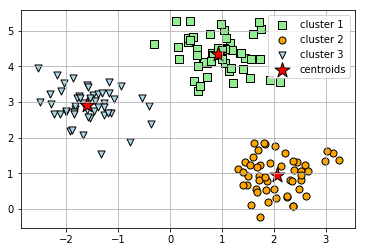

In [5]:
plt.scatter(X[y_km==0,0],
           X[y_km==0,1],
           s=50,c='lightgreen',
           marker='s',edgecolor='black',
           label='cluster 1')

plt.scatter(X[y_km==1,0],
           X[y_km==1,1],
           s=50,c='orange',
           marker='o',edgecolor='black',
           label='cluster 2')

plt.scatter(X[y_km==2,0],
           X[y_km==2,1],
           s=50,c='lightblue',
           marker='v',edgecolor='black',
           label='cluster 3')

plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s=250,c='red',
            marker='*',edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()

In [7]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,
         init='k-means++',
         n_init=10,
         max_iter=300,
         tol=1e-04,
         random_state=0)

y_km=km.fit_predict(X)

Distortion:713.70 


Text(0,0.5,'Distortion')

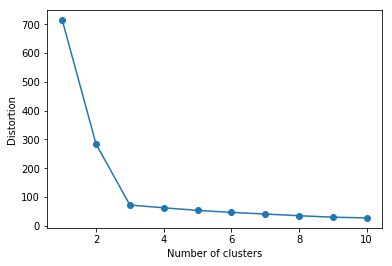

In [10]:
print('Distortion:%.2f '% km.inertia_)

distortions=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

Text(0,0.5,'Cluster distance')

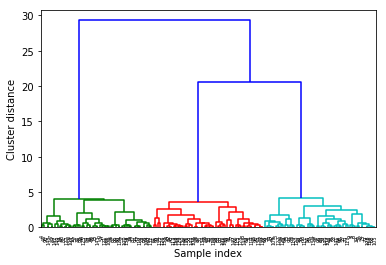

In [12]:
from scipy.cluster.hierarchy import ward
from scipy.cluster.hierarchy import dendrogram

linkage=ward(X)
dendrogram(linkage)
ax=plt.gca()
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

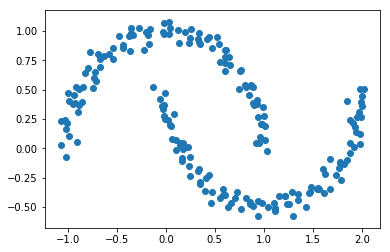

In [15]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=200,noise=0.05,random_state=0)
plt.scatter(X[:,0],X[:,1])

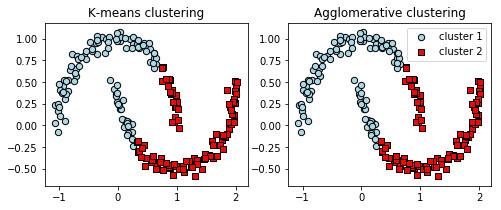

In [19]:
from sklearn.cluster import AgglomerativeClustering
f,(ax1,ax2)=plt.subplots(1,2,figsize=(8,3))
km=KMeans(n_clusters=2,random_state=0)
y_km=km.fit_predict(X)
ax1.scatter(X[y_km==0,0],X[y_km==0,1],
           edgecolor='black',
           c='lightblue',marker='o',s=40,label='cluster 1')
ax1.scatter(X[y_km==1,0],X[y_km==1,1],
           edgecolor='black',
           c='red',marker='s',s=40,label='cluster 2')
ax1.set_title('K-means clustering')

ac=AgglomerativeClustering(linkage = 'ward',
                          affinity = 'euclidean',
                          n_clusters = 2)

y_ac = ac.fit_predict(X)
ax2.scatter(X[y_km==0,0],X[y_km==0,1],
           edgecolor='black',
           c='lightblue',marker='o',s=40,label='cluster 1')
ax2.scatter(X[y_km==1,0],X[y_km==1,1],
           edgecolor='black',
           c='red',marker='s',s=40,label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()

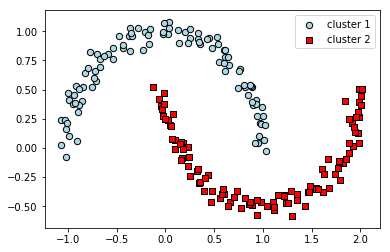

In [22]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.2,min_samples=5,metric='euclidean')
y_db=db.fit_predict(X)
plt.scatter(X[y_db==0,0],X[y_db==0,1],
           c='lightblue',marker='o',s=40,
           edgecolor = 'black',
           label = 'cluster 1')

plt.scatter(X[y_db==1,0],X[y_db==1,1],
           c='red',marker='s',s=40,
           edgecolor = 'black',
           label = 'cluster 2')
plt.legend()